<a href="https://colab.research.google.com/github/daless/NSOPWScraper/blob/master/Bonus_3_AutoEncoders_for_Fashion_Class_Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP #0: PROBLEM STATEMENT  

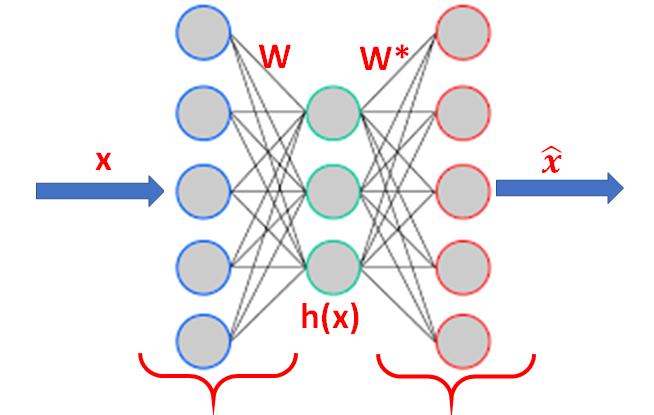


- Auto encoders are a type of Artificial Neural Networks that are used to perform a task of data encoding (representation learning). 
- Auto encoders use the same input data for the input and output, Sounds crazy right!?
- Auto encoders work by adding a bottleneck in the network.
- This bottleneck forces the network to create a compressed (encoded) version of the original input
- Auto encoders work well if correlations exists between input data (performs poorly if the all input data is independent) 


# STEP #1: IMPORT LIBRARIES

In [0]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 93kB/s 
     |████████████████████████████████| 419kB 21.3MB/s 
     |████████████████████████████████| 3.0MB 30.6MB/s 


In [0]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [0]:
tf.__version__

'2.0.0-alpha0'

# STEP #2: LOAD DATASET

In [0]:

# Alternatively, you can use the same dataset made readily available by keras Using the following lines of code:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


# (X_train, y_train),(X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


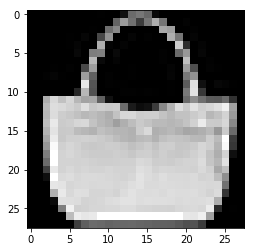

In [0]:
plt.imshow(X_train[100], cmap="gray")

# STEP #3: DATA VISUALIZATION

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

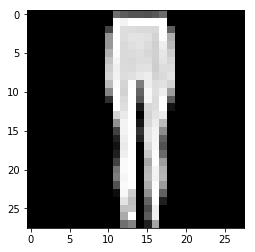

In [0]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000

plt.imshow( X_train[i] , cmap = 'gray') # reshape and plot the image



In [0]:
label = y_train[i]
label


1

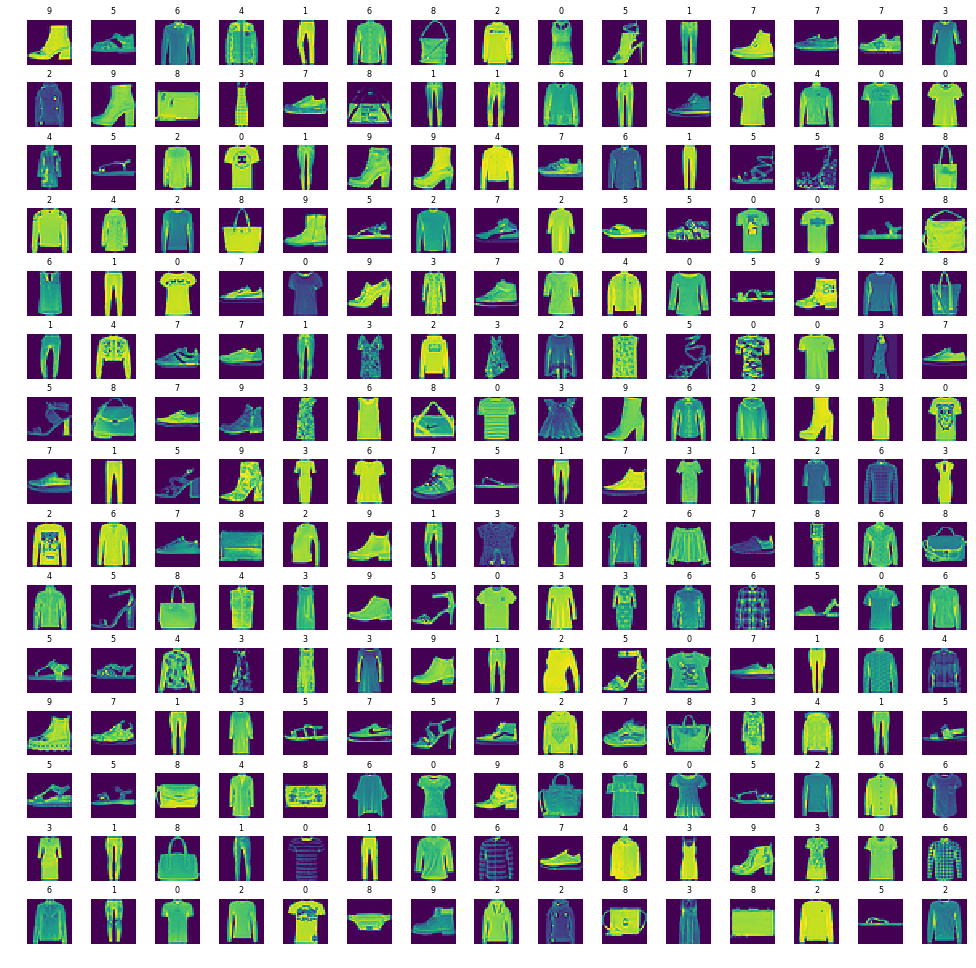

In [0]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


# STEP #4: DATA PREPROCESSING

In [0]:
X_train = X_train / 255
X_test = X_test / 255

# STEP#4: BUILD AND TRAIN OUR AUTOENCODER DEEP LEARNING MODEL

In [0]:
autoencoder = tf.keras.models.Sequential()

# Let's build the encoder CNN
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

# Let's build the decoder CNN 
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))


autoencoder.add(tf.keras.layers.Conv2D(1, (3,3), strides=1, activation='sigmoid', padding="same"))

In [0]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_v2_4 (Ba (None, 28, 28, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_v2_5 (Ba (None, 14, 14, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 32)       

In [0]:
autoencoder.fit(X_train.reshape(-1, 28, 28, 1),          
          X_train.reshape(-1, 28, 28, 1), 
          epochs=10, 
          batch_size=200, 
          validation_data=(X_test.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 244us/sample - loss: 0.2754 - val_loss: 0.5217
Epoch 2/10
60000/60000 [==============================] - 11s 190us/sample - loss: 0.2576 - val_loss: 0.2921
Epoch 3/10
60000/60000 [==============================] - 11s 190us/sample - loss: 0.2548 - val_loss: 0.2563
Epoch 4/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.2531 - val_loss: 0.2544
Epoch 5/10
60000/60000 [==============================] - 11s 191us/sample - loss: 0.2522 - val_loss: 0.2543
Epoch 6/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.2514 - val_loss: 0.2560
Epoch 7/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.2508 - val_loss: 0.2525
Epoch 8/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.2504 - val_loss: 0.2521
Epoch 9/10
60000/60000 [==============================] - 11s 185us/sample - l

# STEP #5: EVALUATE THE MODEL

In [0]:
predicted = autoencoder.predict(X_test[:10].reshape(-1, 28, 28, 1))

In [0]:
predicted.shape

(10, 28, 28, 1)

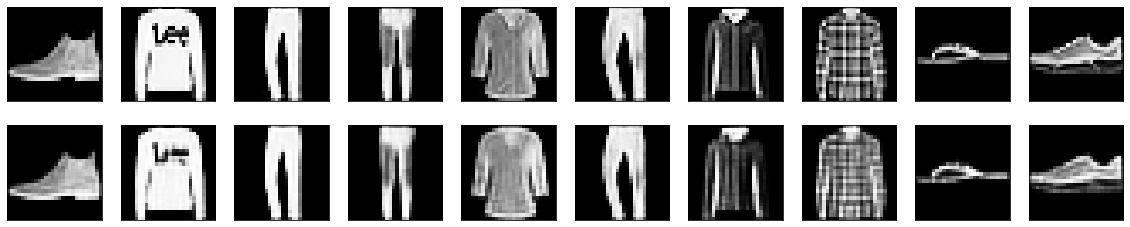

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# GREAT JOB!